In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [8]:
model = Sequential()

In [9]:
model.add(Flatten(input_shape=(28, 28)))

In [10]:
model.add(Dense(20, activation='relu'))

In [11]:
model.add(Dense(80, activation='relu'))

In [12]:
model.add(Dense(100, activation='relu'))

In [13]:
model.add(Dense(160, activation='relu'))

In [14]:
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0897 - accuracy: 0.1804
Epoch 2/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0881 - accuracy: 0.2806
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0788 - accuracy: 0.3431
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0547 - accuracy: 0.6187
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0340 - accuracy: 0.7770
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0245 - accuracy: 0.8430
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0204 - accuracy: 0.8688
Epoch 8/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0181 - accuracy: 0.8836
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0166 - accuracy: 0.8925
Epoch 10/20
60000/60000 [==============================

In [17]:
y_train[33]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Step 3 預測

In [19]:
from ipywidgets import interact_manual

In [20]:
model.predict(np.array([x_test[87]]))

array([[7.3503400e-03, 1.8050802e-06, 8.4656727e-05, 6.3130558e-01,
        7.2827935e-03, 3.4527382e-01, 1.7693602e-03, 7.0285445e-05,
        5.8055655e-03, 1.0557366e-03]], dtype=float32)

In [21]:
model.predict_classes(np.array([x_test[87]]))

array([3])

In [22]:
predict = model.predict_classes(x_test)

In [23]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
def test(測試編號):
    plt.imshow(x_test[測試編號], cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 8


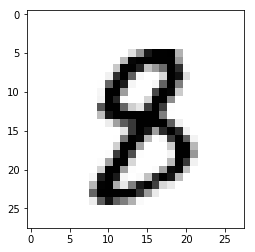

In [25]:
test(1287)

In [27]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [28]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 16us/step


In [29]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.01081830496697512
正確率 0.9308000206947327
